### List of steps or workflow for machine learning models

Train the model
Optimize the model
Validate the model
Predict unknown data points using the model
Interpret and evaluate the model

### State the problem

Predict the ice cream sales using the temperature

### Gather the data

In [1]:
import pandas as pd
df_icecream = pd.read_csv("IceCreamData.csv")
df_icecream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [2]:
#Missing values
df_icecream.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [3]:
#Descriptive Statistics
df_icecream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Revenue'}>]], dtype=object)

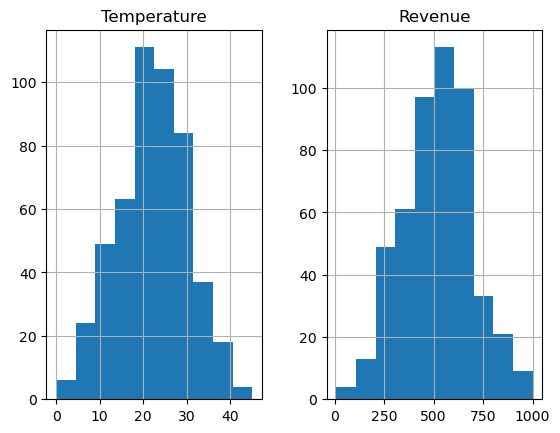

In [4]:
#Distribution using viz
df_icecream.hist()

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/reyestrading/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


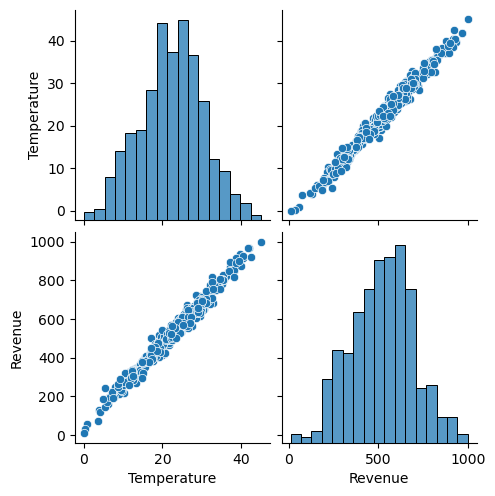

In [6]:
sns.pairplot(df_icecream)

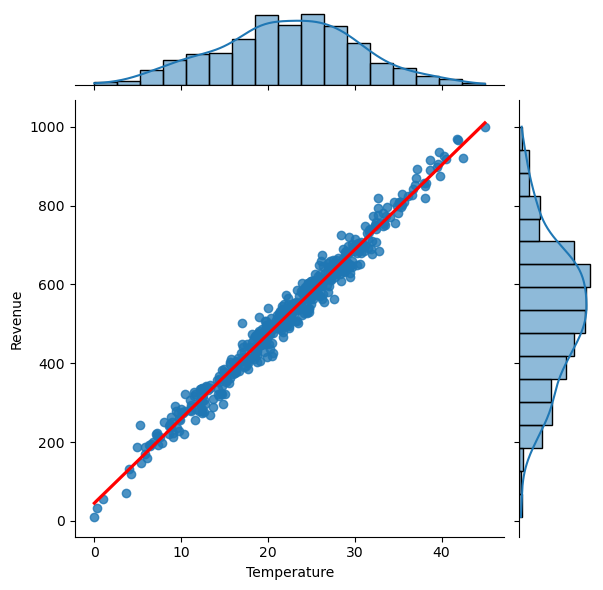

In [7]:
sns.jointplot(x=df_icecream.Temperature,y=df_icecream.Revenue,kind="reg", line_kws={"color": "red"})

### Pre-process the data
- Standardization
- Normalizaiton
- Missing values
- Outlier removal
- Remove duplicates data
- Coverting all the categorical variable to numeric
- Dummy variables or one-hot encoding

### Split train-test sets

In [8]:
type(df_icecream[['Temperature']])

pandas.core.frame.DataFrame

In [9]:
type(df_icecream['Temperature']),type(df_icecream.Temperature)

(pandas.core.series.Series, pandas.core.series.Series)

In [10]:
X = df_icecream[['Temperature']]
y = df_icecream[['Revenue']]

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,y,test_size=0.3, random_state=100)

In [11]:
xTest

,Temperature
69,18.773532
29,35.120151
471,19.494743
344,29.707024
54,10.326389
...,...
308,33.314998
171,15.029112
457,26.360521
75,28.790101


In [12]:
xTrain.shape

(350, 1)

### Establish a baseline

In [13]:
df_icecream.Revenue.mean()

521.57077669154

### Choose a model
 Linear regression
 - Experiment multiple models
 - Linear models
 - Non-linear models

### Train the model

In [14]:
from sklearn.linear_model import LinearRegression
lmModel = LinearRegression(fit_intercept=True)

In [15]:
lmModel.fit(xTrain,yTrain)

LinearRegression()

In [16]:
lmModel.coef_ # y = mx +b -> m

array([[21.52370481]])

In [17]:
lmModel.intercept_ # y = mx +b -> b

array([43.58687859])

### Revenue = 21.52370481 x Temperature + 43.58687859

### Optimize the model
- hyperparameter tuning
- Cross validation
- Grid Search/ Random Search

### Validate the model

Model fitness

In [18]:
#training dataset
lmModel.score(xTrain,yTrain)

0.9794966242142266

In [19]:
#training dataset
lmModel.score(xTest,yTest)

0.9800929550056906

In [20]:
### Predict unknown data points using the model
yhat_test = lmModel.predict(xTest)

In [21]:
pd.DataFrame(yhat_test,columns=['yhat'])

,yhat
0,447.662844
1,799.502650
2,463.185976
3,682.992090
4,265.849035
...,...
145,760.649053
146,367.069044
147,610.962944
148,663.256525


In [22]:
yTest['Revenue']

69     430.343903
29     809.672053
471    429.435702
344    702.994011
54     219.303993
          ...    
308    756.037702
171    366.247714
457    646.266946
75     653.986736
311    335.156856
Name: Revenue, Length: 150, dtype: float64

### Interpret and evaluate the model

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
print(f"Mean Squared Error is {mean_squared_error(yTest,yhat_test)} and R-Squared is {r2_score(yTest,yhat_test)}")

Mean Squared Error is 635.1203798643008 and R-Squared is 0.9800929550056906
